# FEATURE ENGINEERING AND SELECTION

### 1. Generate meaningful features from existing data.
### 2. Use techniques like PCA or feature importance to select the most important features.
### 3. Optimize feature sets for improved model performance.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\DELL\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv("C:/Users/DELL/Downloads/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df.shape

(1025, 14)

In [7]:
df.columns.values

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

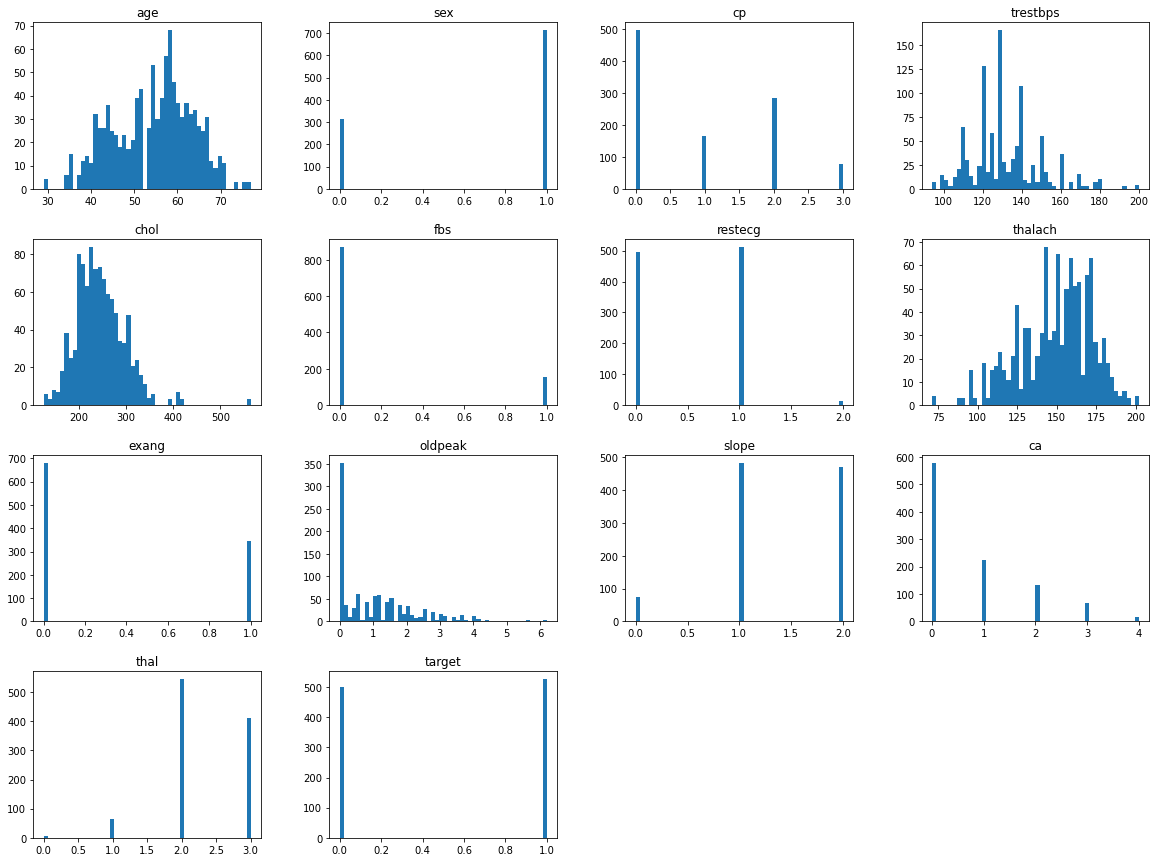

In [10]:
df.hist(bins  = 50 , grid = False, figsize=(20,15))

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
questions = ["1. How many people have heart disease and how many people doesn't have heart disease? ",
"2. People of which sex has most heart disease?",
"3. People of which sex has which type of chest pain most?",
"4. People with which chest pain are most pron to have heart disease?"]

questions

["1. How many people have heart disease and how many people doesn't have heart disease? ",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. People with which chest pain are most pron to have heart disease?']

#### 1. How many people have heart disease and how many people doesn't have heart disease?

In [14]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

Text(0, 0.5, 'Amount')

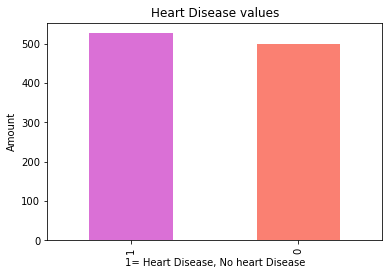

In [15]:
df.target.value_counts().plot(kind= 'bar', color=["orchid", "salmon"])    #bar chart
plt.title("Heart Disease values")
plt.xlabel("1= Heart Disease, No heart Disease")
plt.ylabel("Amount")

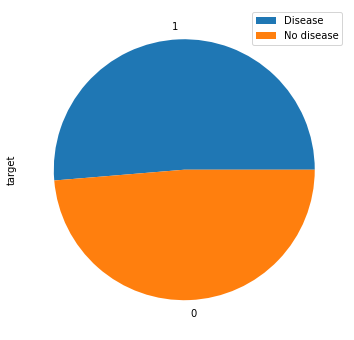

In [16]:
df.target.value_counts().plot(kind = 'pie', figsize = (8, 6))     #pie chart
plt.legend(["Disease", "No disease"])

In [17]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

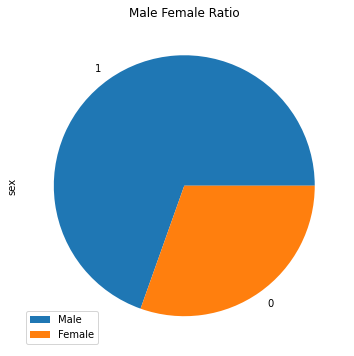

In [18]:
df.sex.value_counts().plot(kind='pie', figsize=(8, 6))   #pie chart
plt.title('Male Female Ratio')
plt.legend(['Male', 'Female'])
plt.show()

#### 2. People of which sex has most heart disease?

In [19]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


Text(0.5, 0, '0 No heart Disease, 1 Heart Disease')

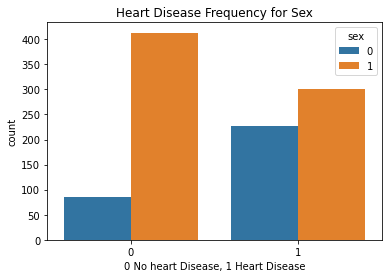

In [20]:
sns.countplot(x = 'target', data =df, hue ='sex')
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 No heart Disease, 1 Heart Disease")

#### 3. People of which sex has which type of chest pain most?

In [21]:
df.cp.value_counts() 

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

Text(0.5, 1.0, 'Chest pain type vs count')

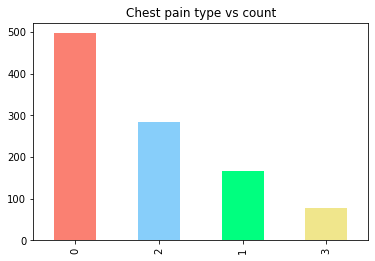

In [22]:
df.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki']) 
plt.title('Chest pain type vs count')

In [23]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,133,57,109,13
1,364,110,175,64


Text(0.5, 0, '0 = Female, 1 = Male')

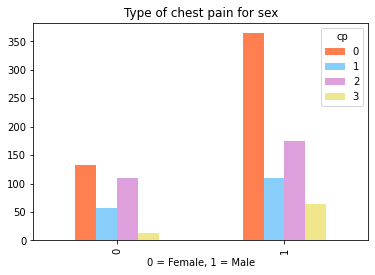

In [24]:
pd.crosstab(df.sex, df.cp).plot(kind ='bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex') 
plt.xlabel('0 = Female, 1 = Male')

#### 4. People with which chest pain are most prom to have heart disease?

In [25]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


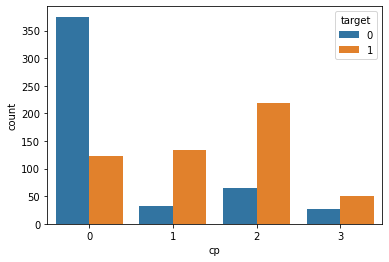

In [26]:
sns.countplot(x = 'cp', data = df, hue = 'target')

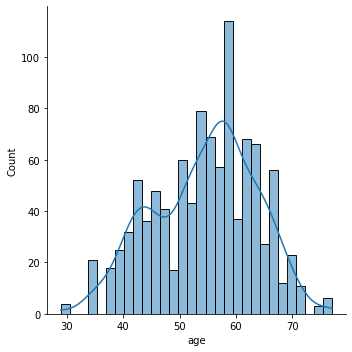

In [27]:
#create a distribution plot with normal distribution curve
sns.displot(x = 'age', data = df, bins = 30, kde = True)

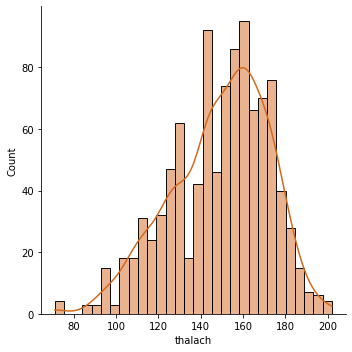

In [28]:
#Maximum Heart rate
sns.displot(x = 'thalach', data = df, bins = 30, kde = True, color = 'chocolate')

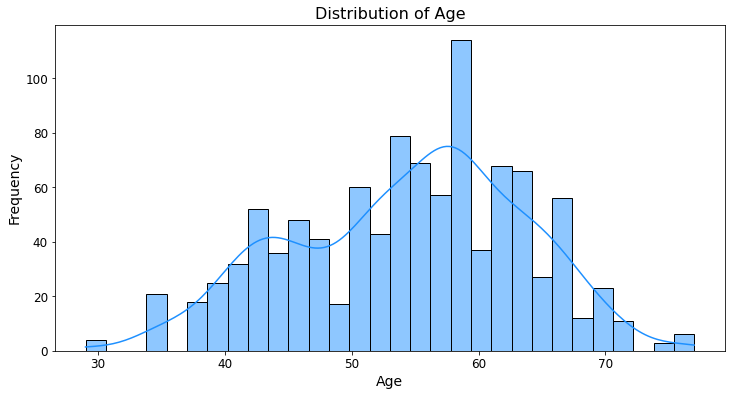

In [29]:
#Distribution of age among patients

plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=30, kde=True, color='dodgerblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

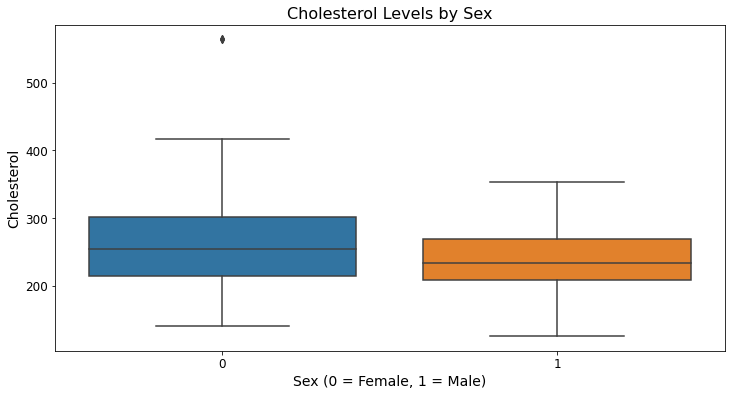

In [30]:
#Distribution of cholesterol levels by sex

plt.figure(figsize=(12, 6))
sns.boxplot(x='sex', y='chol', data=df)
plt.title('Cholesterol Levels by Sex', fontsize=16)
plt.xlabel('Sex (0 = Female, 1 = Male)', fontsize=14)
plt.ylabel('Cholesterol', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

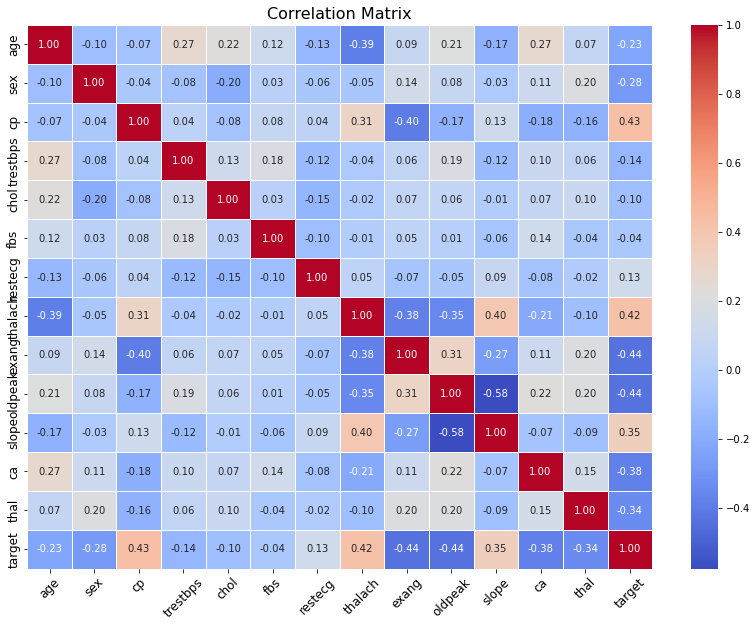

In [31]:
#Correlation between different features

plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

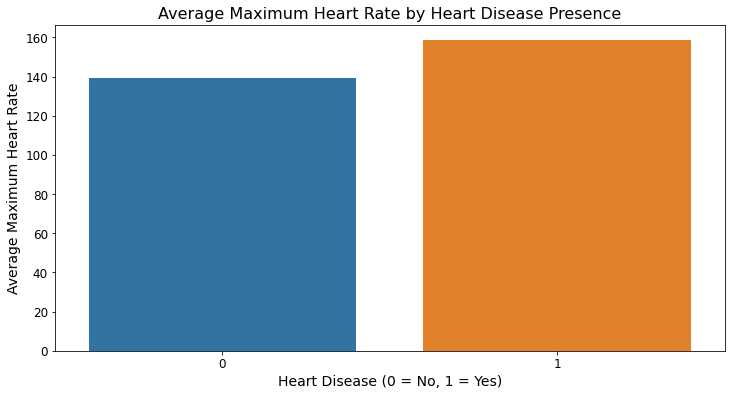

In [32]:
#Average maximum heart rate achieved by patients grouped by target

plt.figure(figsize=(12, 6))
thalach_mean = df.groupby('target')['thalach'].mean().reset_index()
sns.barplot(x='target', y='thalach', data=thalach_mean)
plt.title('Average Maximum Heart Rate by Heart Disease Presence', fontsize=16)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Average Maximum Heart Rate', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

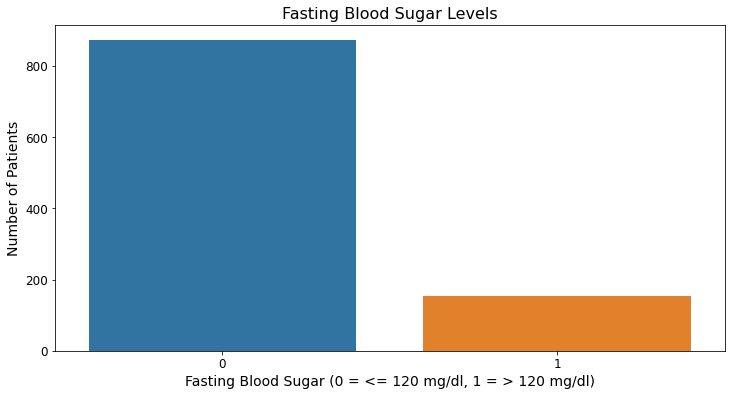

In [33]:
#Fasting blood sugar levels

plt.figure(figsize=(12, 6))
fbs_counts = df['fbs'].value_counts().reset_index()
fbs_counts.columns = ['FBS Level', 'Count']  # Rename columns for clarity
sns.barplot(x='FBS Level', y='Count', data=fbs_counts)
plt.title('Fasting Blood Sugar Levels', fontsize=16)
plt.xlabel('Fasting Blood Sugar (0 = <= 120 mg/dl, 1 = > 120 mg/dl)', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

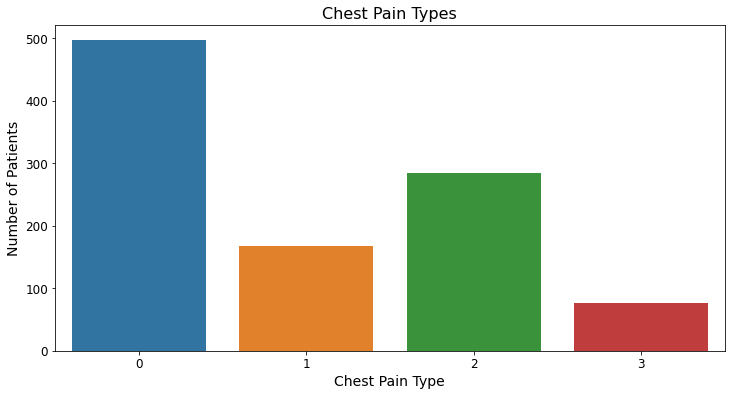

In [34]:
#Distribution of chest pain types

plt.figure(figsize=(12, 6))
cp_counts = df['cp'].value_counts().reset_index()
cp_counts.columns = ['Chest Pain Type', 'Count']  # Rename columns for clarity
sns.barplot(x='Chest Pain Type', y='Count', data=cp_counts)
plt.title('Chest Pain Types', fontsize=16)
plt.xlabel('Chest Pain Type', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

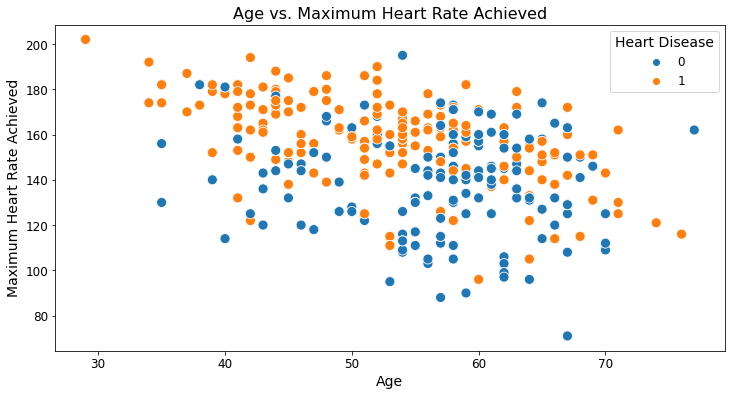

In [35]:
#Relationship between age and maximum heart rate achieved

plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='thalach', data=df, hue='target', s=100)
plt.title('Age vs. Maximum Heart Rate Achieved', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Maximum Heart Rate Achieved', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Heart Disease', fontsize=12, title_fontsize=14)
plt.show()

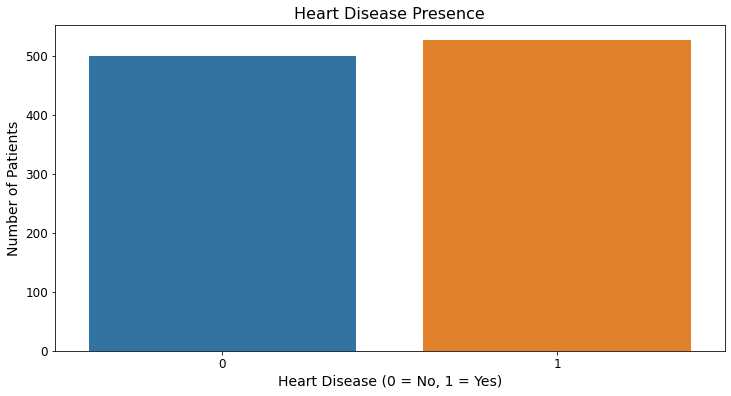

In [36]:
#Heart disease presence

plt.figure(figsize=(12, 6))
target_counts = df['target'].value_counts().reset_index()
target_counts.columns = ['Heart Disease', 'Count']  # Rename columns for clarity
sns.barplot(x='Heart Disease', y='Count', data=target_counts)
plt.title('Heart Disease Presence', fontsize=16)
plt.xlabel('Heart Disease (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Number of Patients', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [37]:
from sklearn.preprocessing import PolynomialFeatures

# Select the relevant columns for feature generation
features = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(features)

# Add the new features to the original data
poly_features

array([[5.2000e+01, 1.2500e+02, 2.1200e+02, ..., 2.8224e+04, 1.6800e+02,
        1.0000e+00],
       [5.3000e+01, 1.4000e+02, 2.0300e+02, ..., 2.4025e+04, 4.8050e+02,
        9.6100e+00],
       [7.0000e+01, 1.4500e+02, 1.7400e+02, ..., 1.5625e+04, 3.2500e+02,
        6.7600e+00],
       ...,
       [4.7000e+01, 1.1000e+02, 2.7500e+02, ..., 1.3924e+04, 1.1800e+02,
        1.0000e+00],
       [5.0000e+01, 1.1000e+02, 2.5400e+02, ..., 2.5281e+04, 0.0000e+00,
        0.0000e+00],
       [5.4000e+01, 1.2000e+02, 1.8800e+02, ..., 1.2769e+04, 1.5820e+02,
        1.9600e+00]])